In [9]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('C:/Users/87173/Desktop/term6/Machine Learning/Homework/HW3/HW3_data/4/diabetes_train.csv', header=None)
df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.0,0.54,0.68,0.65,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-1.0,0.74,1.59,1.18,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.25,0.88,0.59,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-1.0,0.28,1.80,1.17,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.0,0.39,1.35,0.55,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
5,-1.0,0.47,1.08,0.77,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,1.0,0.89,1.58,1.37,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,-1.0,0.36,1.53,1.34,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,-1.0,0.79,1.88,1.12,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
9,-1.0,0.58,1.58,0.20,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [11]:
Y = df[0]
X = df[list(range(1,21))]
X = np.hstack((X,np.ones((len(X),1)))) #add column of 1 for bias
X.shape

(3000, 21)

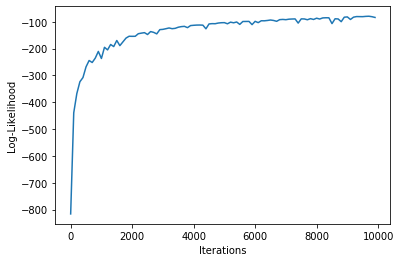

[ 2.68516489 -8.42817513  3.80710869  0.49773983  0.01904191 -0.17743251
  0.22939511 -0.15092504  0.10719039  0.24595781  0.06094803  0.16867817
  0.09628077  0.04061422  0.04296256  0.1689115   0.5844969  -0.22762661
 -7.89112922  3.9553326 ]
0.5687443454841945


In [12]:
def logit_sgd(x, y, n):
    lr=0.1
    log_list=[]
    iteration_list=[]
    w = np.zeros((x.shape[1],))
    for iteration in range(n):
        i = random.randint(0,len(x)-1)
        grad = (-1*y[i]*x[i])/(1+math.exp(y[i]*(np.dot(w,x[i]))))
        w = w-(lr*grad)
        if (iteration%100==0):
            log_val = 0
            for i in range(len(x)):
                log_val += math.log(1/(1+math.exp(-1*y[i]*(np.dot(w,x[i])))),10)
            log_list.append(log_val)
            iteration_list.append(iteration)
    plt.plot(iteration_list,log_list)
    plt.xlabel("Iterations")
    plt.ylabel('Log-Likelihood')
    plt.show()
    return w[0:20], w[20]

w,w0 = logit_sgd(X,Y,10000)
print(w)
print(w0)
